### Import Libraries

In [25]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Collecting seaborn



In [28]:
pip install pandas_profiling


  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
  Using cached ImageHash-4.2.1.tar.gz (812 kB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=bdfa1bc260a020e9170350c5914a1db7ce6e274f5a02a1e69af113bcd33df617
  Stored in directory: c:\users\athir\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295221 sha256=fa8333dad9c04e2ea116855ff0da670f9f6e4fec1a17edb43da6e3316c4c1a10
  Stored in directory: c:\users\athir\appdata\local\pip\cache\wheels\4c\d5\59\5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from pandas_profiling import ProfileReport

C:\Users\athir\OneDrive\Documents\ineuron\Project\Machine-learning-Project\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Import dataset

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/Athira-M-Chandran/Datasets/main/Insurance%20Premium/insurance.csv")

### Data Preprocessing

In [9]:
df.shape

(1338, 7)

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


> <u>Inference</u><br> Min and Max age in this dataset is 18 and 64 respectively. <br> Average bmi is 30.<br> Average expenses is 13,270/-


### Missing values

In [14]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

> No missing values

### Categorical values

In [17]:
for i in df.columns:
    if df[i].nunique() <5:
        print(f'{i} = {df[i].unique()} ')
        

sex = ['female' 'male'] 
smoker = ['yes' 'no'] 
region = ['southwest' 'southeast' 'northwest' 'northeast'] 


> Sex, Smoker, Region are categorical columns

In [19]:
for i in df.columns:
    if df[i].nunique() <5:
        print(f'{df[i].value_counts()}')
        print('------------------------------')

male      676
female    662
Name: sex, dtype: int64
------------------------------
no     1064
yes     274
Name: smoker, dtype: int64
------------------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
------------------------------


> Balanced data

### Boxplot for finding outliers

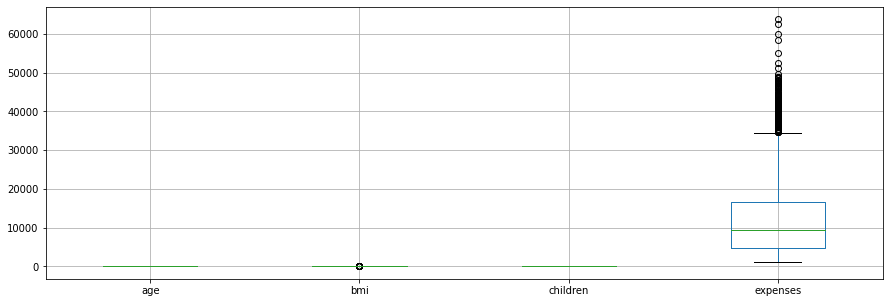

In [23]:
fig = plt.figure(figsize =(15, 5))
 

# Creating plot
bp = df.boxplot()
 
# show plot
plt.show()

### Correlation


<AxesSubplot:>

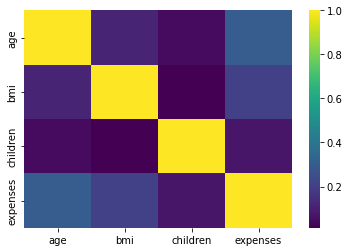

In [30]:
sns.heatmap(df.corr(), cmap='viridis')

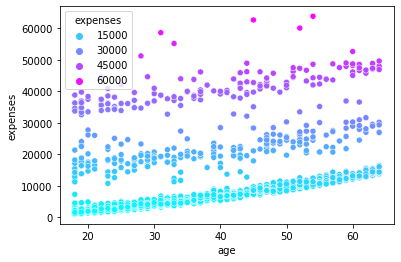

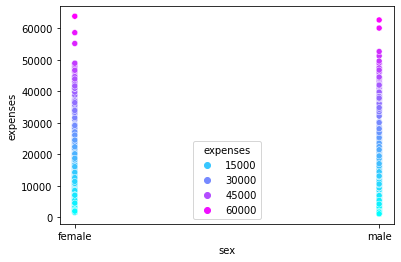

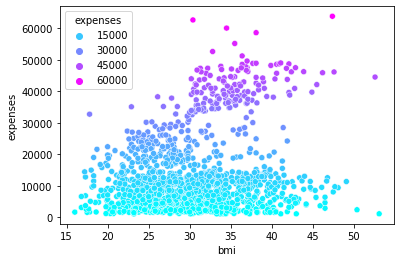

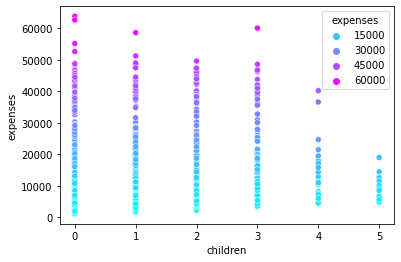

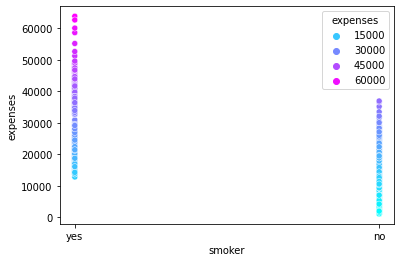

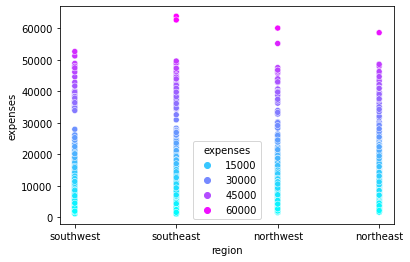

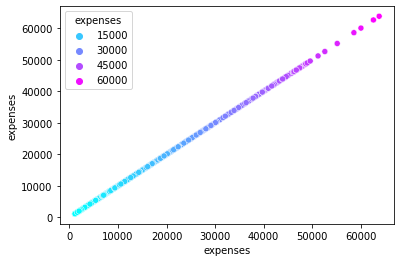

In [38]:
for i in df.columns:
    sns.scatterplot(data=df, x=i, y='expenses',hue='expenses',palette='cool')
    plt.show()

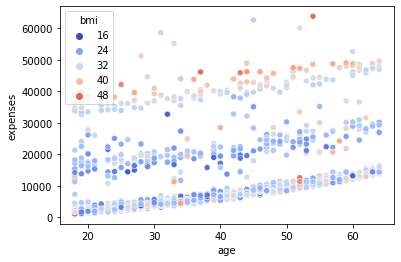

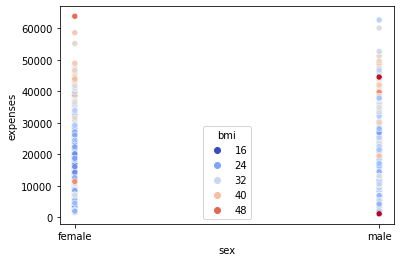

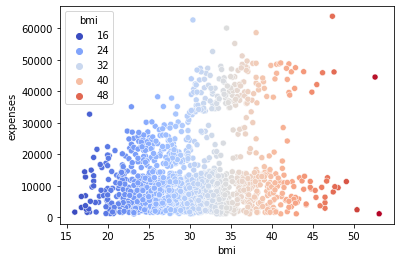

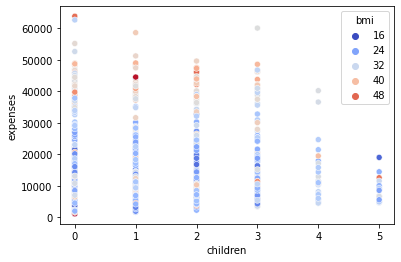

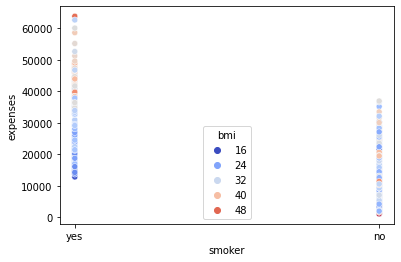

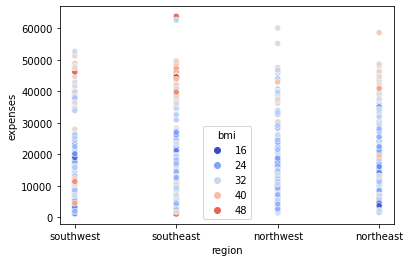

In [47]:
for i in df.columns[0:-1]:
    sns.scatterplot(data=df, x=i, y='expenses',hue='bmi',palette='coolwarm')
    plt.show()

> shows high bmi have high premium

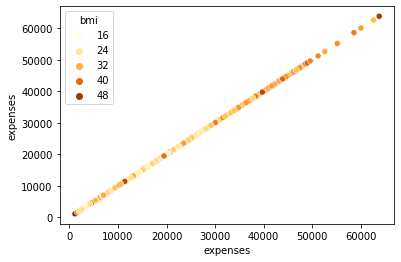

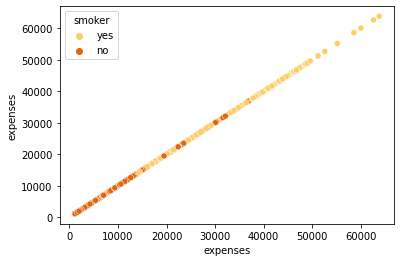

In [45]:
for i in ['bmi','smoker']:
    sns.scatterplot(data=df, x='expenses', y='expenses',hue=i,palette='YlOrBr')
    plt.show()

> person who smokes and have high bmi have high premium

<AxesSubplot:xlabel='expenses', ylabel='Count'>

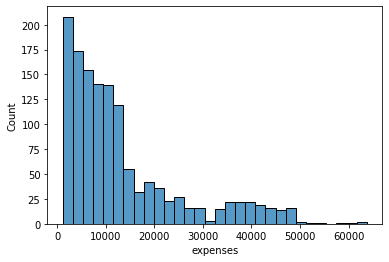

In [51]:
sns.histplot(df['expenses'])